In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Turkiye Electric Generation by Source in Percentage Through Years
pd.set_option('display.max_rows', 60)
skipped_rows = [0,1,2,4]
skipped_rows += range(57,66)
skipped_rows += range(5,25)
skipped_columns = [1,3,9,10]
df1 = pd.read_excel("enerji uretimi.xls", skiprows=skipped_rows)
df1 = df1.drop(df1.columns[skipped_columns], axis=1)
display(df1)

,Year,Total,Coal,Liquid fuels,Natural Gas,Hydro,Renewable Energy and wastes(1)
0,1990,57543.000000,35.100000,6.800000,17.700000,40.200000,0.200000
1,1991,60246.000000,35.800000,5.600000,20.800000,37.600000,0.200000
2,1992,67342.000000,36.500000,7.800000,16.000000,39.500000,0.200000
3,1993,73808.000000,32.100000,7.000000,14.600000,46.100000,0.200000
4,1994,78322.000000,36.000000,7.100000,17.600000,39.100000,0.200000
5,1995,86247.000000,32.500000,6.700000,19.200000,41.200000,0.400000
6,1996,94862.000000,32.000000,6.900000,18.100000,42.700000,0.300000
7,1997,103296.000000,32.800000,6.900000,21.400000,38.500000,0.400000
8,1998,111022.000000,32.200000,7.200000,22.400000,38.000000,0.300000
9,1999,116440.000000,31.800000,6.900000,31.200000,29.800000,0.300000


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [5]:
df1.columns = ['Year', 'Total', 'Coal', 'Liquid fuels', 'Natural Gas', 'Hydro', 'Renewable Energy']


X = df1['Year'].values.reshape(-1, 1)

y1 = df1['Total']
y2 = df1.drop(['Year', 'Total'], axis=1)
# display(y1)

## Testing the model | Model1 = Lineer Regression

In [6]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train,y_train1)
predictions = model.predict(X_test)

# display(y_test1)
# display(X_test)
# print(type(X_test))

# display(predictions)


mse = mean_squared_error(y_test1, predictions)
mae = mean_absolute_error(y_test1, predictions)
print(f'Mean Squared Error for Total: {mse}')
print(f'Mean Absolute Error for Total: {mae}\n')


Mean Squared Error for Total: 27376342.30456823
Mean Absolute Error for Total: 3650.892998613467



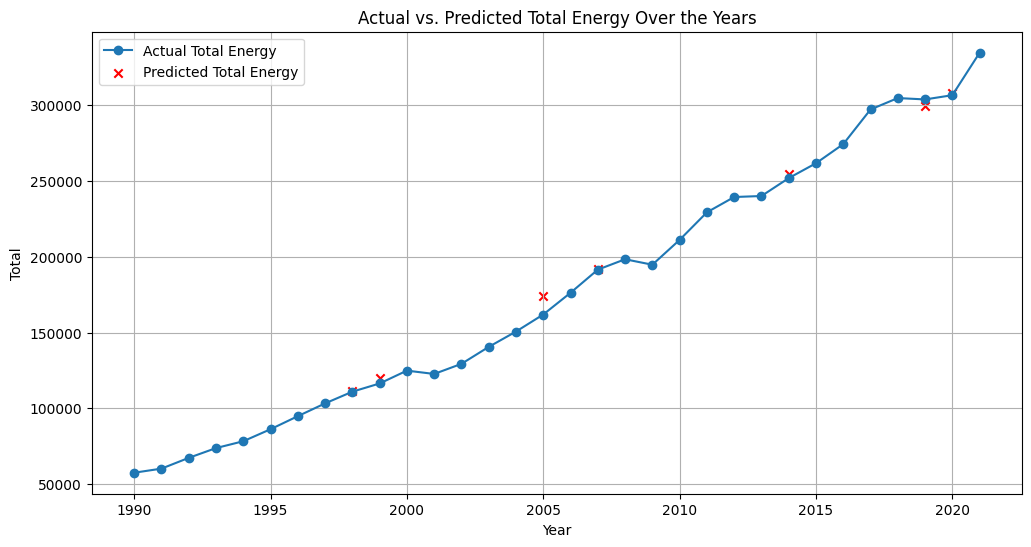

In [7]:
X_test_df = pd.DataFrame(X_test, columns=['Year'])
# display(X_test_df)

# Create a DataFrame for predictions with the "Renewable Data" column
predictions_df = pd.DataFrame(predictions, columns=['Total'])

# Concatenate the two DataFrames along columns to merge them
merged_df = pd.concat([X_test_df, predictions_df], axis=1)

# Convert the "Year" column to integer (in case it's not already)
merged_df['Year'] = merged_df['Year'].astype(int)

# display(merged_df)


plt.figure(figsize=(12, 6))
plt.plot(df1['Year'], df1['Total'], label='Actual Total Energy', marker='o')

# Plot the predictions
plt.scatter(merged_df['Year'], merged_df['Total'], color='red', label='Predicted Total Energy', marker='x')

# Add labels and a legend
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Actual vs. Predicted Total Energy Over the Years')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

### Predicting the future

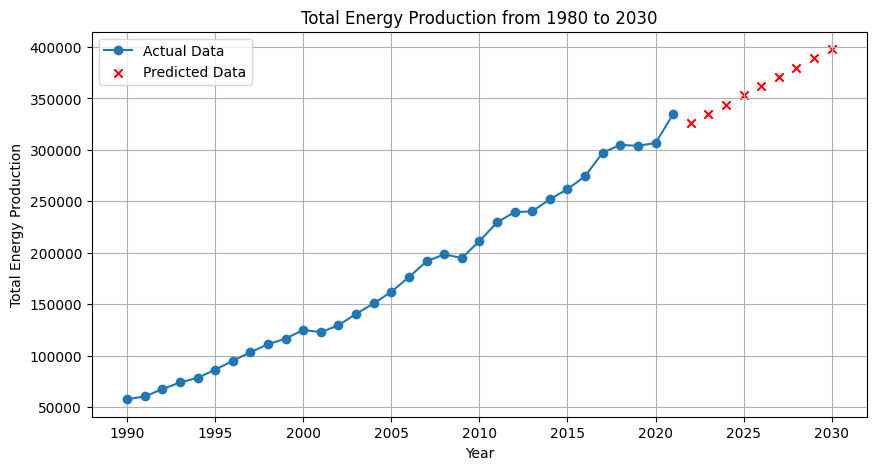

In [8]:
# Train the model on the entire dataset
model = LinearRegression()
model.fit(X, y1)

# Prepare the new data for prediction
new_X = np.array([[2022], [2023], [2024], [2025], [2026], [2027], [2028], [2029], [2030]])

predictions_future = model.predict(new_X)

# Create a new figure for plotting
plt.figure(figsize=(10, 5))

# Plot the original data
plt.plot(df1['Year'], y1, label='Actual Data', marker='o')

# Plot the predicted values
plt.scatter(new_X.flatten(), predictions_future, color='red', label='Predicted Data', marker='x')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Energy Production')
plt.title('Total Energy Production from 1980 to 2030')

plt.legend()

plt.grid(True)

plt.show()

## Testing the model Part 2 | Model2

Polynomial Mean Squared Error for Coal: 4.414031975608688
Polynomial Mean Absolute Error for Coal: 1.6475762871209076

Polynomial Mean Squared Error for Liquid fuels: 0.3519414675176584
Polynomial Mean Absolute Error for Liquid fuels: 0.4448800078227123

Polynomial Mean Squared Error for Natural Gas: 45.009060187398426
Polynomial Mean Absolute Error for Natural Gas: 5.634594187839613

Polynomial Mean Squared Error for Hydro: 27.53869682990162
Polynomial Mean Absolute Error for Hydro: 4.649740216704841

Polynomial Mean Squared Error for Renewable Energy: 0.09808708750850097
Polynomial Mean Absolute Error for Renewable Energy: 0.23704195213718363



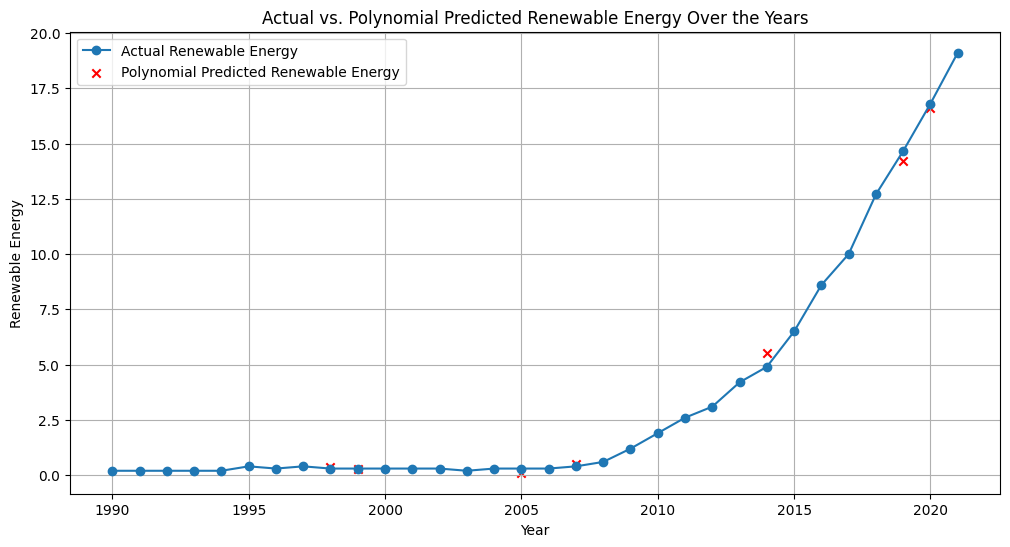

In [9]:
X_train, X_test, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

# the degree of the polynomial features
degree = 3

# a pipeline that first creates the polynomial features, then applies linear regression
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

poly_model.fit(X_train, y_train2)

# Predict using the test data
poly_predictions = poly_model.predict(X_test)

# Evaluate the model
for col in y2.columns:
    poly_mse = mean_squared_error(y_test2[col], poly_predictions[:, y2.columns.get_loc(col)])
    poly_mae = mean_absolute_error(y_test2[col], poly_predictions[:, y2.columns.get_loc(col)])
    print(f'Polynomial Mean Squared Error for {col}: {poly_mse}')
    print(f'Polynomial Mean Absolute Error for {col}: {poly_mae}\n')

# Preparing data for plotting predictions
poly_predictions_df = pd.DataFrame(poly_predictions[:, y2.columns.get_loc('Renewable Energy')], columns=['Renewable Energy'])
poly_merged_df = pd.concat([X_test_df, poly_predictions_df], axis=1)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df1['Year'], df1['Renewable Energy'], label='Actual Renewable Energy', marker='o')
plt.scatter(poly_merged_df['Year'], poly_merged_df['Renewable Energy'], color='red', label='Polynomial Predicted Renewable Energy', marker='x')
plt.xlabel('Year')
plt.ylabel('Renewable Energy')
plt.title('Actual vs. Polynomial Predicted Renewable Energy Over the Years')
plt.legend()
plt.grid(True)
plt.show()

### Predicting the future Part 2

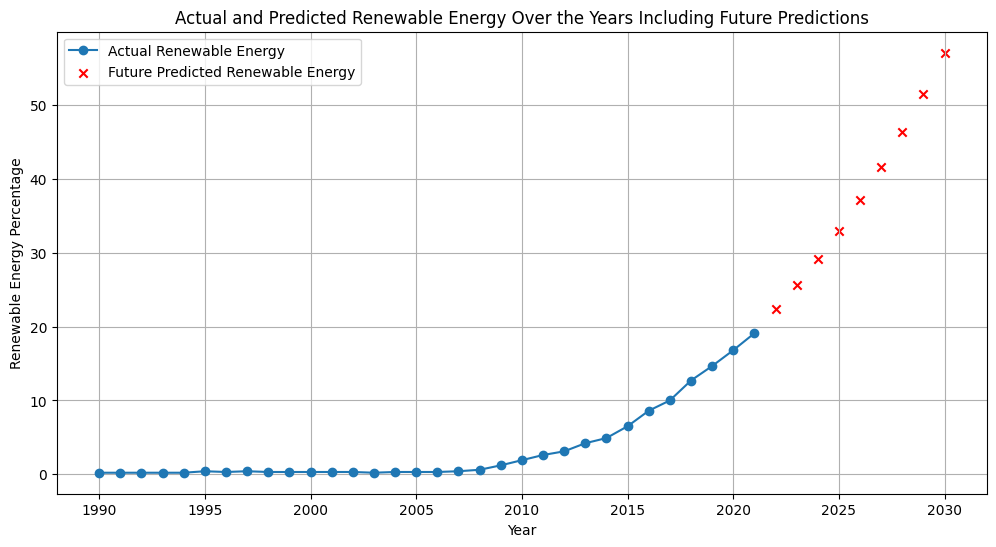

In [10]:
# fit it on the entire dataset
poly_model.fit(X, y2['Renewable Energy'])

# Prepare the new data for prediction. Here we're predicting for 2022-2030.
# this array can be extended with more years if needed.
future_years = np.array([[2022], [2023], [2024], [2025], [2026], [2027], [2028], [2029], [2030]])

# Predict the future values
future_predictions = poly_model.predict(future_years)

# plot the original data along with the predictions
plt.figure(figsize=(12, 6))

plt.plot(df1['Year'], df1['Renewable Energy'], label='Actual Renewable Energy', marker='o')

plt.scatter(future_years.flatten(), future_predictions, color='red', label='Future Predicted Renewable Energy', marker='x')


plt.title('Actual and Predicted Renewable Energy Over the Years Including Future Predictions')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Percentage')

plt.legend()

plt.grid(True)

plt.show()


# Part 2

In [11]:
# Turkiye Greenhouse Gas emissions (Million Tonnes of CO2)

skipped_rows1 = [0,1,2]
skipped_rows1+= range(36,46)
df2 = pd.read_excel("sera gazi emisyonlari (milyon ton co2 esdegeri).xls", skiprows=skipped_rows1)
df2.columns = ['Year', 'Total', 'CO2', 'CH4', 'N2O', 'F-gases']

In [12]:
display(df2)

,Year,Total,CO2,CH4,N2O,F-gases
0,1990,219.526151,151.614981,42.487543,24.950823,0.472804
1,1991,226.794721,158.126315,43.377429,24.733992,0.556985
2,1992,233.132483,164.064876,43.288202,25.259650,0.519754
3,1993,240.771746,171.138875,43.065540,26.048287,0.519045
4,1994,234.387830,167.565647,42.787878,23.570421,0.463884
5,1995,248.248909,181.355257,42.613471,23.870854,0.409326
6,1996,267.581386,199.646693,42.968946,24.542460,0.423287
7,1997,278.813841,212.108198,42.231314,24.050525,0.423804
8,1998,280.318959,212.135043,42.421875,25.338883,0.423158
9,1999,277.776799,207.927912,43.789483,25.636443,0.422961


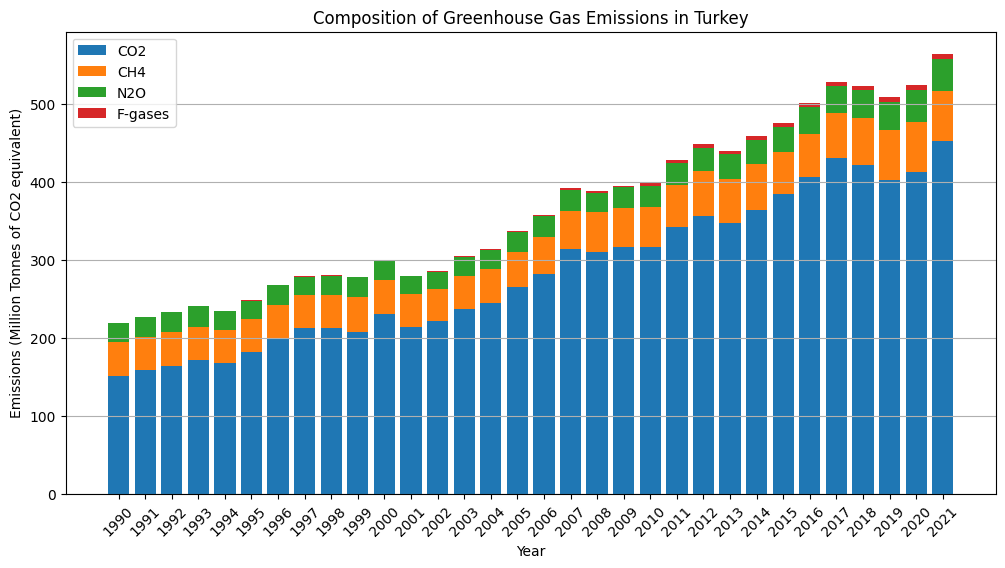

In [13]:

plt.figure(figsize=(12, 6))
plt.bar(df2['Year'], df2['CO2'], label='CO2')
plt.bar(df2['Year'], df2['CH4'], bottom=df2['CO2'], label='CH4')
plt.bar(df2['Year'], df2['N2O'], bottom=df2['CO2'] + df2['CH4'], label='N2O')
plt.bar(df2['Year'], df2['F-gases'], bottom=df2['CO2'] + df2['CH4'] + df2['N2O'], label='F-gases')
plt.xlabel('Year')
plt.ylabel('Emissions (Million Tonnes of CO2 equivalent)')
plt.title('Composition of Greenhouse Gas Emissions in Turkey')
plt.legend()
plt.xticks(df2['Year'], rotation=45)
plt.grid(axis='y')
plt.show()


# Part 3

In [14]:
# USA Electric Generation by Source in Years

df3 = pd.read_csv("generation-major-source.csv", skiprows = range(0,4))
df3.columns = df3.iloc[0]
df3 = df3[41:-1]

df3[['coal', 'natural gas', 'nuclear', 'renewables', 'petroleum and other']] = df3[['coal', 'natural gas', 'nuclear', 'renewables', 'petroleum and other']].astype(int)
df3["total"] = df3[['coal', 'natural gas', 'nuclear', 'renewables', 'petroleum and other']].sum(axis=1)
df3 = df3.reset_index(drop=True)

df3.columns = ['Year', 'Coal', 'Natural Gas', 'Nuclear', 'Renewables', 'Petroleum and other', 'Total']
display(df3)

,Year,Coal,Natural Gas,Nuclear,Renewables,Petroleum and other,Total
0,1990.0,1594,373,577,357,137,3038
1,1991.0,1591,382,613,358,131,3075
2,1992.0,1621,404,619,327,113,3084
3,1993.0,1690,415,610,357,125,3197
4,1994.0,1691,460,640,337,120,3248
5,1995.0,1709,496,673,385,90,3353
6,1996.0,1795,455,675,423,96,3444
7,1997.0,1845,479,629,434,105,3492
8,1998.0,1874,531,674,400,141,3620
9,1999.0,1881,556,728,399,130,3694


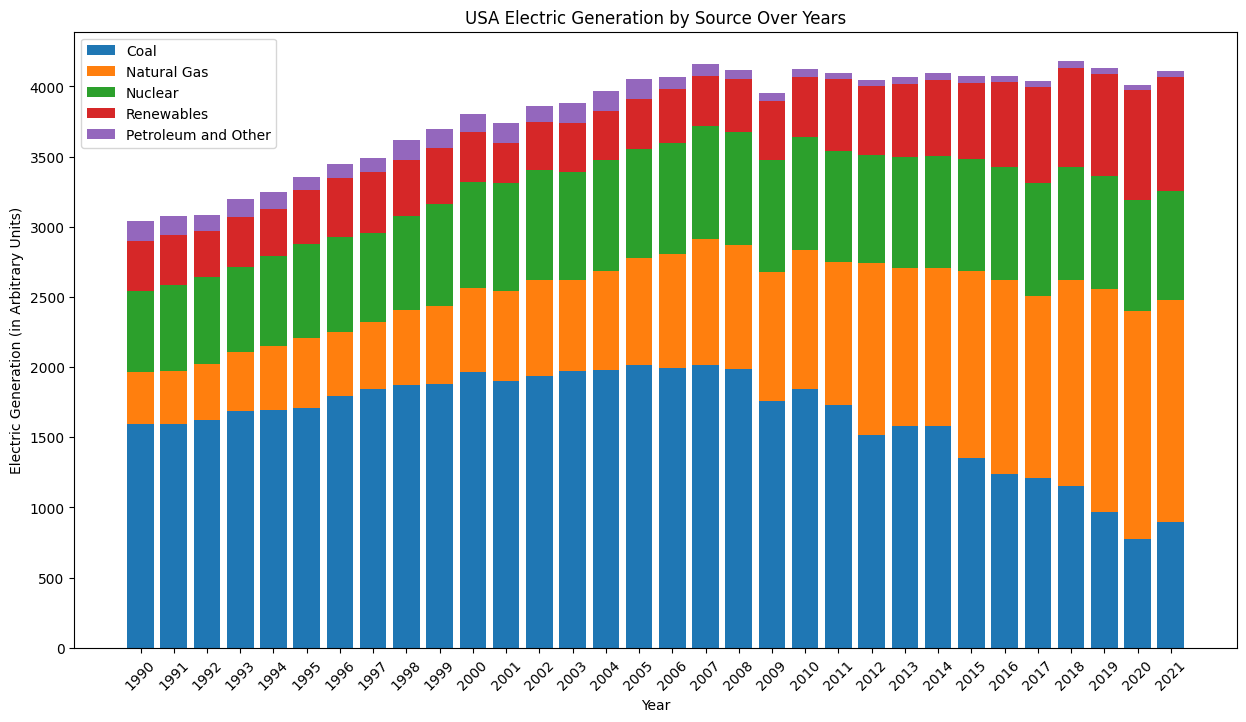

In [15]:
df3['Year'] = df3['Year'].astype(int)

plt.figure(figsize=(15, 8))
plt.bar(df3['Year'], df3['Coal'], label='Coal')
plt.bar(df3['Year'], df3['Natural Gas'], bottom=df3['Coal'], label='Natural Gas')
plt.bar(df3['Year'], df3['Nuclear'], bottom=df3['Coal'] + df3['Natural Gas'], label='Nuclear')
plt.bar(df3['Year'], df3['Renewables'], bottom=df3['Coal'] + df3['Natural Gas'] + df3['Nuclear'], label='Renewables')
plt.bar(df3['Year'], df3['Petroleum and other'], bottom=df3['Coal'] + df3['Natural Gas'] + df3['Nuclear'] + df3['Renewables'], label='Petroleum and Other')

plt.xlabel('Year')
plt.ylabel('Electric Generation (in Arbitrary Units)')
plt.title('USA Electric Generation by Source Over Years')
plt.legend()
plt.xticks(df3['Year'], rotation=45)
plt.show()


Predictor

In [16]:
X = df3['Year'].values.reshape(-1, 1)

y3 = df3[['Total']]
y4 = df3.drop(['Year', 'Total'], axis=1)
# display(y1)

In [17]:
X_train, X_test, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=42)


model2 = LinearRegression()
model2.fit(X_train,y_train3)
predictions2 = model2.predict(X_test)
display(predictions2)


# display(y_test1)
# display(X_test)
# print(type(X_test))

# display(predictions)


mse = mean_squared_error(y_test1, predictions)
mae = mean_absolute_error(y_test1, predictions)
print(f'Mean Squared Error for Total: {mse}')
print(f'Mean Absolute Error for Total: {mae}\n')


array([[4314.15340909],
       [3782.08223684],
       [4124.12799043],
       [3858.09240431],
       [3516.04665072],
       [3554.05173445],
       [4352.15849282]])

Mean Squared Error for Total: 27376342.30456823
Mean Absolute Error for Total: 3650.892998613467



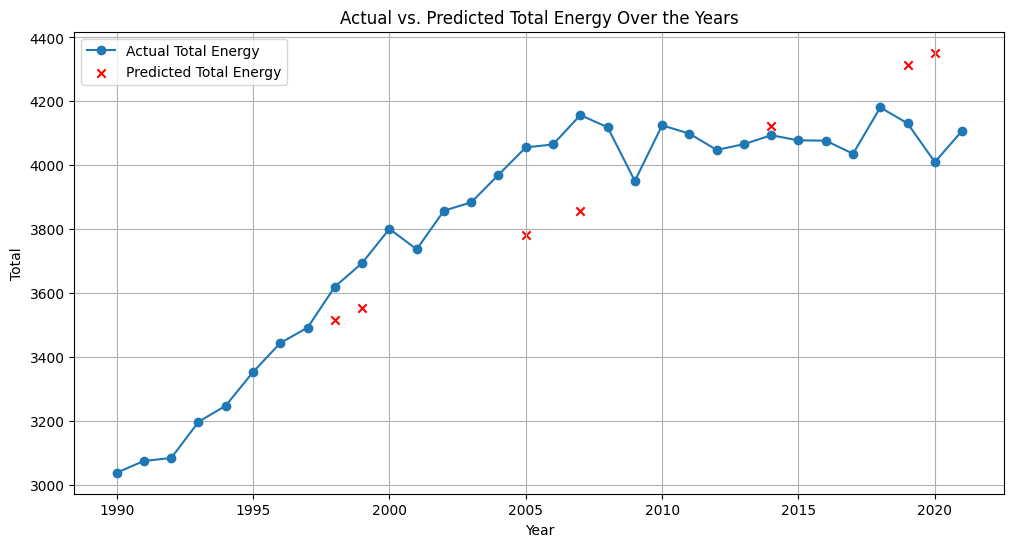

In [18]:
X_test_df = pd.DataFrame(X_test, columns=['Year'])
# display(X_test_df)

# Create a dataframe for predictions with the "Renewable Data" column
predictions2_df = pd.DataFrame(predictions2, columns=['Total'])
# display(predictions2_df)

# Concatenate the two dataframes along columns to merge them
merged_df = pd.concat([X_test_df, predictions2_df], axis=1)
# display(merged_df)

# Convert the "Year" column to integer (in case it's not already)
merged_df['Year'] = merged_df['Year'].astype(int)

# display(merged_df)


plt.figure(figsize=(12, 6))
plt.plot(df3['Year'], df3['Total'], label='Actual Total Energy', marker='o')

# Plot the predictions
plt.scatter(merged_df['Year'], merged_df['Total'], color='red', label='Predicted Total Energy', marker='x')

plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Actual vs. Predicted Total Energy Over the Years')
plt.legend()

plt.grid(True)
plt.show()

Polynomial Mean Squared Error for Total: 5677.342751302227
Polynomial Mean Absolute Error for Total: 57.869224716254394



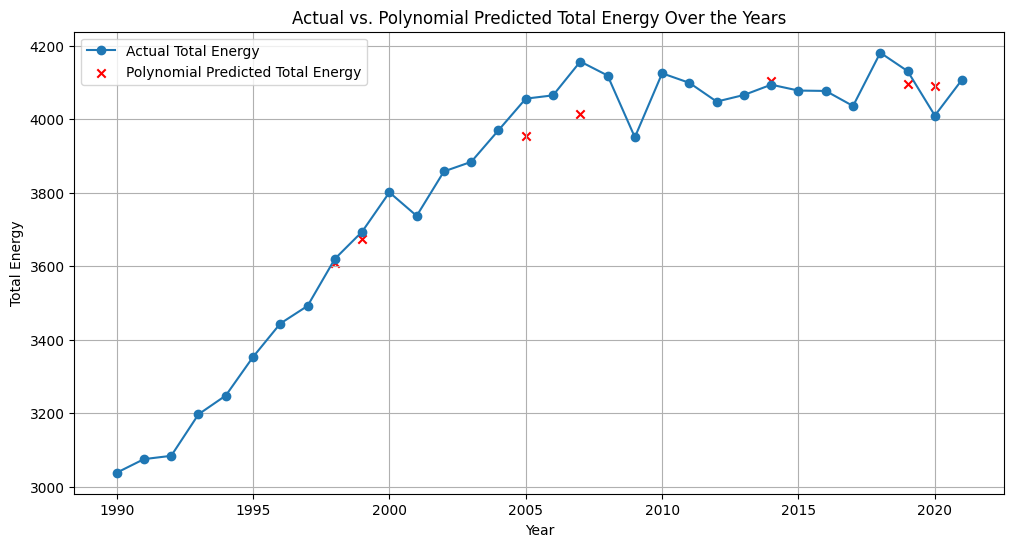

In [19]:
# the degree of the polynomial features
degree = 51

# a pipeline that first creates the polynomial features, then applies linear regression
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data
poly_model.fit(X_train, y_train3)

# Predict using the test data
poly_predictions = poly_model.predict(X_test)

# Evaluate the model
for col in y3.columns:
    poly_mse = mean_squared_error(y_test3[col], poly_predictions[:, y3.columns.get_loc(col)])
    poly_mae = mean_absolute_error(y_test3[col], poly_predictions[:, y3.columns.get_loc(col)])
    print(f'Polynomial Mean Squared Error for {col}: {poly_mse}')
    print(f'Polynomial Mean Absolute Error for {col}: {poly_mae}\n')

# Prepare data for plotting predictions
poly_predictions_df = pd.DataFrame(poly_predictions[:, y3.columns.get_loc('Total')], columns=['Total'])
poly_merged_df = pd.concat([X_test_df, poly_predictions_df], axis=1)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df3['Year'], df3['Total'], label='Actual Total Energy', marker='o')
plt.scatter(poly_merged_df['Year'], poly_merged_df['Total'], color='red', label='Polynomial Predicted Total Energy', marker='x')
plt.xlabel('Year')
plt.ylabel('Total Energy')
plt.title('Actual vs. Polynomial Predicted Total Energy Over the Years')
plt.legend()
plt.grid(True)
plt.show()

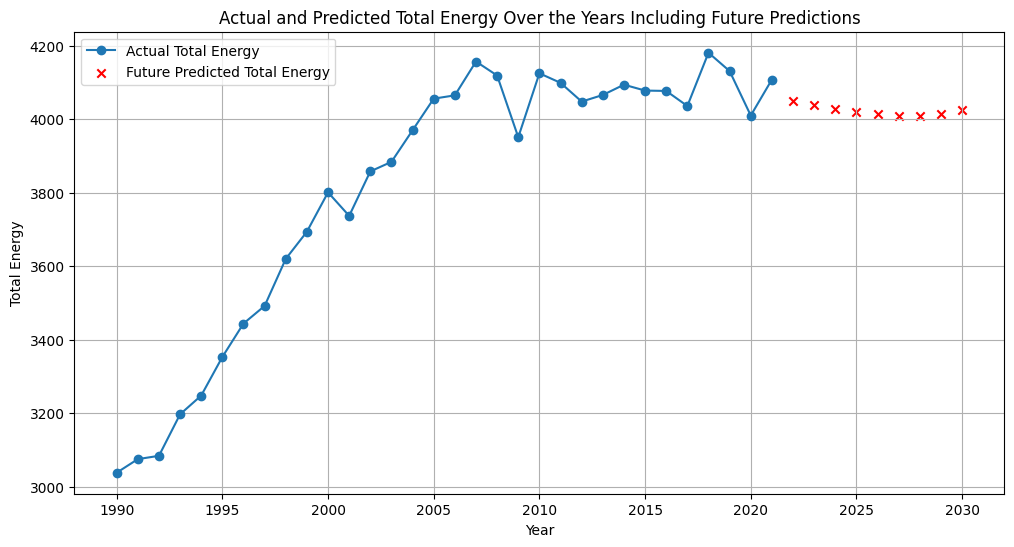

In [20]:
poly_model.fit(X, y3['Total'])

future_years = np.array([[2022], [2023], [2024], [2025], [2026], [2027], [2028], [2029], [2030]])

future_predictions = poly_model.predict(future_years)

# plot the original data with the predictions
plt.figure(figsize=(12, 6))

plt.plot(df3['Year'], df3['Total'], label='Actual Total Energy', marker='o')

plt.scatter(future_years.flatten(), future_predictions, color='red', label='Future Predicted Total Energy', marker='x')

plt.title('Actual and Predicted Total Energy Over the Years Including Future Predictions')
plt.xlabel('Year')
plt.ylabel('Total Energy')

plt.legend()

plt.grid(True)

plt.show()

## Part 2 prediction

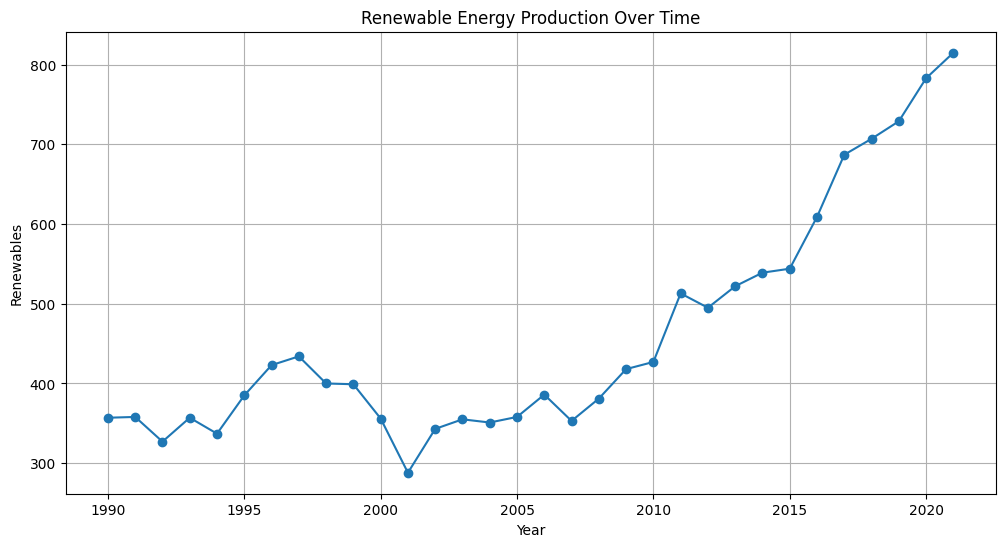

In [21]:
plt.figure(figsize=(12, 6))

plt.plot(df3['Year'], df3['Renewables'], marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Renewables')
plt.title('Renewable Energy Production Over Time')

plt.grid(True)

plt.show()

Polynomial Mean Squared Error for Coal: 8916.131999370002
Polynomial Mean Absolute Error for Coal: 83.46742901418891

Polynomial Mean Squared Error for Natural Gas: 3558.698550625246
Polynomial Mean Absolute Error for Natural Gas: 46.11758216364043

Polynomial Mean Squared Error for Nuclear: 290.21482069684726
Polynomial Mean Absolute Error for Nuclear: 13.000928177365235

Polynomial Mean Squared Error for Renewables: 880.0769934766643
Polynomial Mean Absolute Error for Renewables: 23.877109761748994

Polynomial Mean Squared Error for Petroleum and other: 408.9228787126191
Polynomial Mean Absolute Error for Petroleum and other: 12.165980754154068



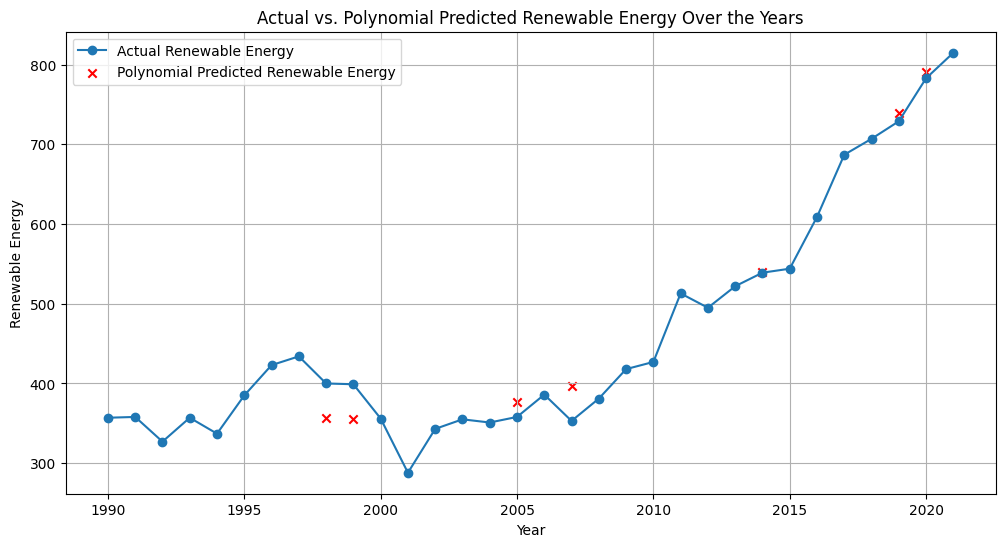

In [22]:
X_train, X_test, y_train4, y_test4 = train_test_split(X, y4, test_size=0.2, random_state=42)

# the degree of the polynomial features
degree = 3

# a pipeline that first creates the polynomial features, then applies linear regression
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data
poly_model.fit(X_train, y_train4)

# Predict using the test data
poly_predictions = poly_model.predict(X_test)

# Evaluate the model
for col in y4.columns:
    poly_mse = mean_squared_error(y_test4[col], poly_predictions[:, y4.columns.get_loc(col)])
    poly_mae = mean_absolute_error(y_test4[col], poly_predictions[:, y4.columns.get_loc(col)])
    print(f'Polynomial Mean Squared Error for {col}: {poly_mse}')
    print(f'Polynomial Mean Absolute Error for {col}: {poly_mae}\n')

# Prepare data for plotting predictions
poly_predictions_df = pd.DataFrame(poly_predictions[:, y4.columns.get_loc('Renewables')], columns=['Renewables'])
poly_merged_df = pd.concat([X_test_df, poly_predictions_df], axis=1)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df3['Year'], df3['Renewables'], label='Actual Renewable Energy', marker='o')
plt.scatter(poly_merged_df['Year'], poly_merged_df['Renewables'], color='red', label='Polynomial Predicted Renewable Energy', marker='x')
plt.xlabel('Year')
plt.ylabel('Renewable Energy')
plt.title('Actual vs. Polynomial Predicted Renewable Energy Over the Years')
plt.legend()
plt.grid(True)
plt.show()

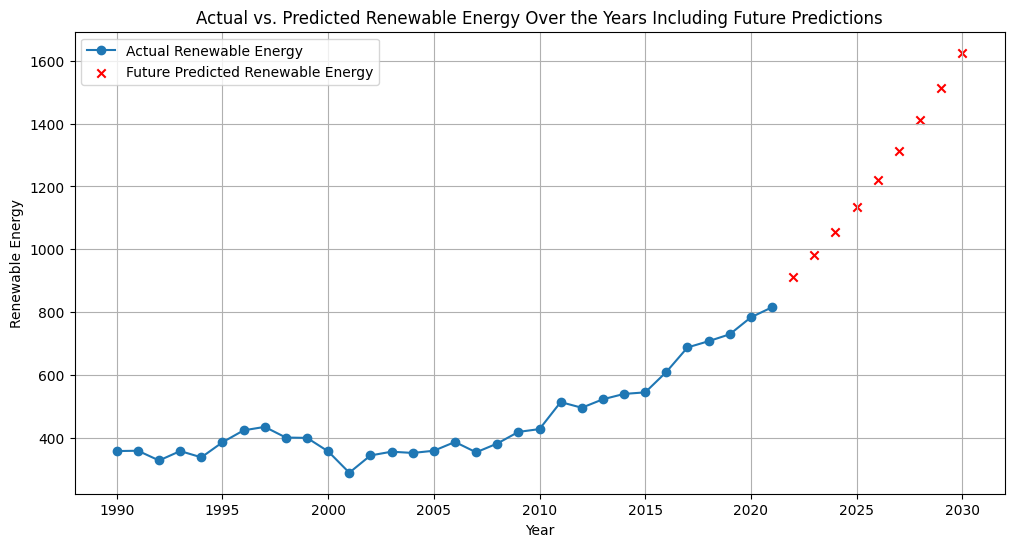

In [23]:
# fit it on the entire dataset now.
poly_model.fit(X, y4['Renewables'])

future_years = np.array([[2022], [2023], [2024], [2025], [2026], [2027], [2028], [2029], [2030]])

future_predictions = poly_model.predict(future_years)

plt.figure(figsize=(12, 6))

# Plot the original data
plt.plot(df3['Year'], df3['Renewables'], label='Actual Renewable Energy', marker='o')

# Plot the predicted future values
plt.scatter(future_years.flatten(), future_predictions, color='red', label='Future Predicted Renewable Energy', marker='x')

plt.title('Actual vs. Predicted Renewable Energy Over the Years Including Future Predictions')
plt.xlabel('Year')
plt.ylabel('Renewable Energy')


plt.legend()

plt.grid(True)

plt.show()


# Part 4

In [24]:
# USA and TR Greenhouse Gas Emissions (Tonnes of CO2)

df4 = pd.read_csv("usa_tr_greenhouse_emisions.csv")

df4 = df4[df4['Unit Code'] == 'T_CO2_EQVT']
df4 = df4[df4['Pollutant'] == 'Greenhouse gases']
df4 = df4[df4['Variable'] == 'Total emissions excluding LULUCF']
df4 = df4[df4['Variable'] == 'Total emissions excluding LULUCF']


df4 = df4.drop(columns=['COU', 'POL', 'VAR', 'YEA', 'PowerCode Code', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags', 'Unit Code', 'Variable'])
df4 = df4.reset_index(drop=True)


display(df4)

,Country,Pollutant,Year,Unit,PowerCode,Value
0,Türkiye,Greenhouse gases,1990,Tonnes of CO2 equivalent,Thousands,219526.15
1,Türkiye,Greenhouse gases,1991,Tonnes of CO2 equivalent,Thousands,226794.72
2,Türkiye,Greenhouse gases,1992,Tonnes of CO2 equivalent,Thousands,233132.48
3,Türkiye,Greenhouse gases,1993,Tonnes of CO2 equivalent,Thousands,240771.75
4,Türkiye,Greenhouse gases,1994,Tonnes of CO2 equivalent,Thousands,234387.83
...,...,...,...,...,...,...
59,United States,Greenhouse gases,2017,Tonnes of CO2 equivalent,Thousands,6561824.44
60,United States,Greenhouse gases,2018,Tonnes of CO2 equivalent,Thousands,6754831.65
61,United States,Greenhouse gases,2019,Tonnes of CO2 equivalent,Thousands,6617916.88
62,United States,Greenhouse gases,2020,Tonnes of CO2 equivalent,Thousands,6025973.61


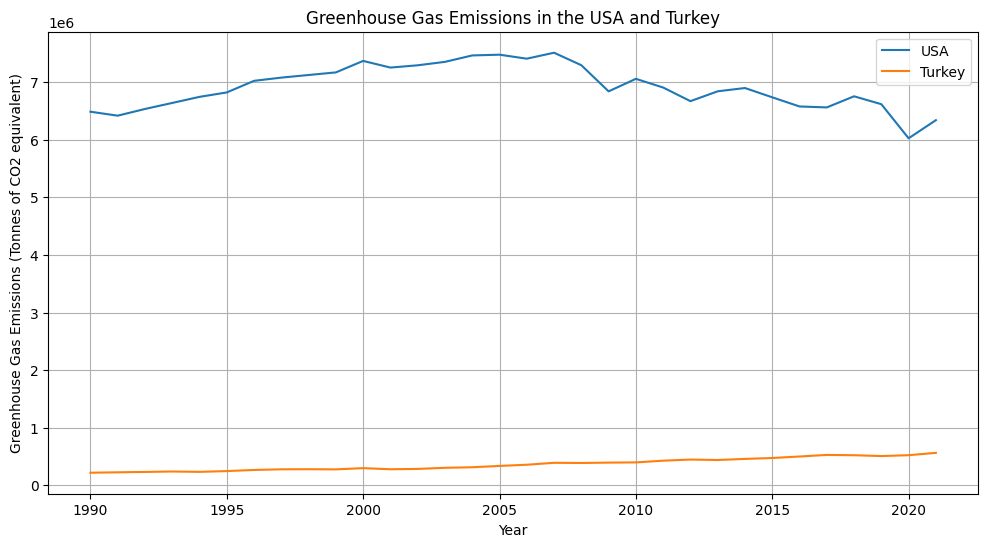

In [25]:
# Split the data by country
df_usa = df4[df4['Country'] == 'United States']
df_tr = df4[df4['Country'] == 'Türkiye']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_usa['Year'], df_usa['Value'], label='USA')
plt.plot(df_tr['Year'], df_tr['Value'], label='Turkey')

plt.xlabel('Year')
plt.ylabel('Greenhouse Gas Emissions (Tonnes of CO2 equivalent)')
plt.title('Greenhouse Gas Emissions in the USA and Turkey')
plt.legend()
plt.grid(True)
plt.show()